# What is plagiarism?

Plagiarism is the act of using someone else’s work, ideas, or intellectual property without proper attribution or permission and presenting it as one’s own. It involves copying or closely imitating the content, ideas, or expressions created by others, whether it’s written text, research findings, art, music, software, or any other form of creative or intellectual work.





# Import Modules

In [ ]:
import nltk
nltk.download("popular")
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import string
from nltk.corpus import stopwords
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
! pip install wordcloud
from wordcloud import WordCloud
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
#Classification Report and model evaluation
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Python/Plagiarism.csv")
data.head()

,Unnamed: 0,source_text,plagiarized_text,label
0,0,Researchers have discovered a new species of b...,Scientists have found a previously unknown but...,1
1,1,The moon orbits the Earth in approximately 27....,Our natural satellite takes around 27.3 days t...,1
2,2,Water is composed of two hydrogen atoms and on...,H2O consists of 2 hydrogen atoms and 1 oxygen ...,1
3,3,The history of Rome dates back to 753 BC.,Rome has a long history that can be traced bac...,1
4,4,Pluto was once considered the ninth planet in ...,"In the past, Pluto was classified as the ninth...",1


In [ ]:
data['label'].value_counts()

,count
label,
0,187
1,183


<Axes: xlabel='label'>

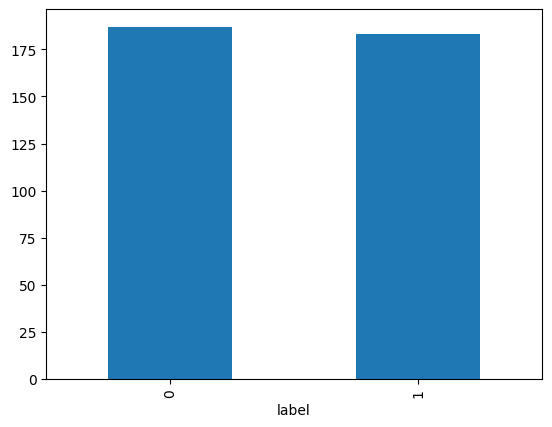

In [ ]:
data['label'].value_counts().plot(kind="bar")

# Clean Text

In [ ]:
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text
data["source_text"] = data["source_text"].apply(preprocess_text)
data["plagiarized_text"] = data["plagiarized_text"].apply(preprocess_text)

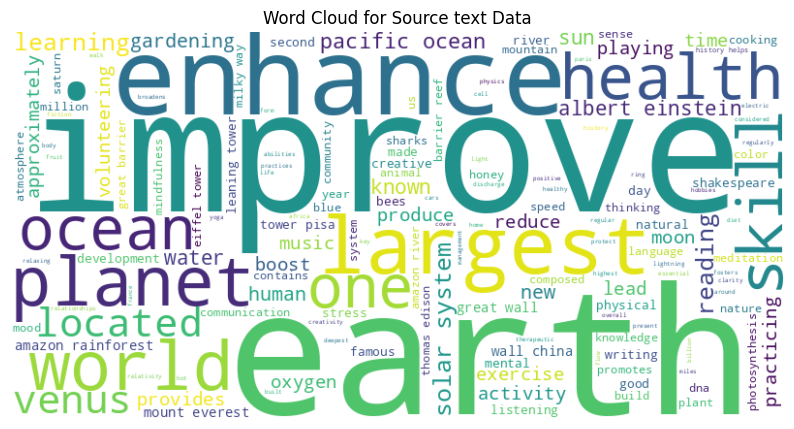

In [36]:
text_data_combined = ' '.join(data['source_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(text_data_combined)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Source text Data')
plt.show()

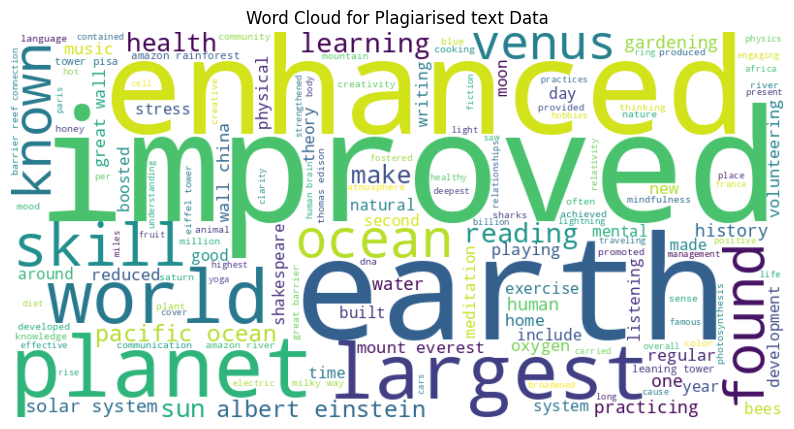

In [37]:
text_data_combined = ' '.join(data['plagiarized_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(text_data_combined)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Plagiarised text Data')
plt.show()

# Train Test Split

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data["source_text"] + " " + data["plagiarized_text"])

In [ ]:
y = data["label"]

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix")
print(cm)

Accuracy: 0.8243243243243243
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.86      0.79      0.83        39

    accuracy                           0.82        74
   macro avg       0.83      0.83      0.82        74
weighted avg       0.83      0.82      0.82        74

Confusion Matrix
[[30  5]
 [ 8 31]]


# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Generate classification report
classification_rep = classification_report(y_test, y_pred)
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Print results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.7972972972972973
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.97      0.82        35
           1       0.96      0.64      0.77        39

    accuracy                           0.80        74
   macro avg       0.83      0.81      0.79        74
weighted avg       0.84      0.80      0.79        74

Confusion Matrix:
[[34  1]
 [14 25]]


# Naiv Bays Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Instantiate the model
model = MultinomialNB()
# Fit the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Generate classification report
classification_rep = classification_report(y_test, y_pred)
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Print results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.8648648648648649
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.87      0.87      0.87        39

    accuracy                           0.86        74
   macro avg       0.86      0.86      0.86        74
weighted avg       0.86      0.86      0.86        74

Confusion Matrix:
[[30  5]
 [ 5 34]]


# SVM

In [ ]:
# Instantiate the model
model = SVC(kernel='linear', random_state=42)
# Fit the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Generate classification report
classification_rep = classification_report(y_test, y_pred)
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Print results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.8783783783783784
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.89      0.87      0.88        39

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74

Confusion Matrix:
[[31  4]
 [ 5 34]]


In [ ]:


modelclasses = [
    ["Logistic_Regression", LogisticRegression],
    ["NaiveBayes", MultinomialNB],
    ["Random Forest Classifier", RandomForestClassifier],
    ["GradientBoosting", GradientBoostingClassifier],
    ["Decision Tree Classifier", DecisionTreeClassifier]
]

results = []

for modelname, Model in modelclasses:
    model = Model()
    model.fit(X_train_tf, list(y_train))  # Ensure that y_train is an array of integers
    y_score2 = model.predict_proba(X_test_tf)[:,1]
    y_pred2 = model.predict(X_test_tf)
    scores2 = cross_val_score(model, X_train_tf, y_train, cv=3,scoring='accuracy')
    class_report = classification_report(y_test, y_pred2)
    auc2 = np.round(roc_auc_score(y_test, y_score2, multi_class='ovr'), 2)
    training_score2=np.round(model.score(X_train_tf, y_train),2)
    Accuracy2 = np.round(accuracy_score(y_test,y_pred2), 2)
    results.append({'modelname': modelname, 'auc_score': auc2, 'accuracy': Accuracy2})

results_df1 = pd.DataFrame(results)

In [ ]:
results_df1

,modelname,auc_score,accuracy
0,Logistic_Regression,0.94,0.86
1,NaiveBayes,0.93,0.89
2,Random Forest Classifier,0.95,0.82
3,GradientBoosting,0.89,0.80
4,Decision Tree Classifier,0.83,0.82


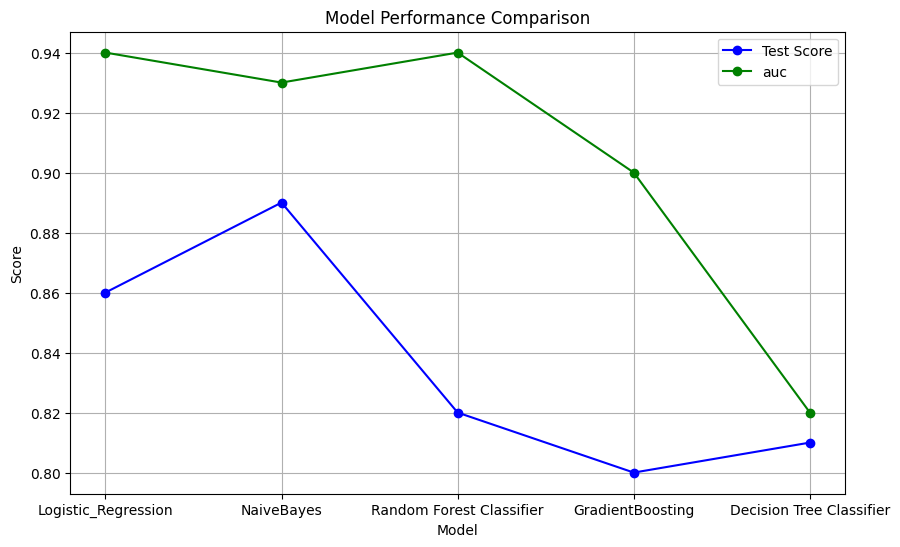

In [ ]:
# Model Performance Charts(TFIDFvectorizer)
model_names = results_df1['modelname']
test_scores = results_df1['accuracy']
auc = results_df1['auc_score']

plt.figure(figsize=(10, 6))

# Line chart for test scores
plt.plot(model_names, test_scores, marker='o', label='Test Score', linestyle='-', color='blue')

# Line chart for accuracy scores
plt.plot(model_names, auc, marker='o', label='auc', linestyle='-', color='green')

plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

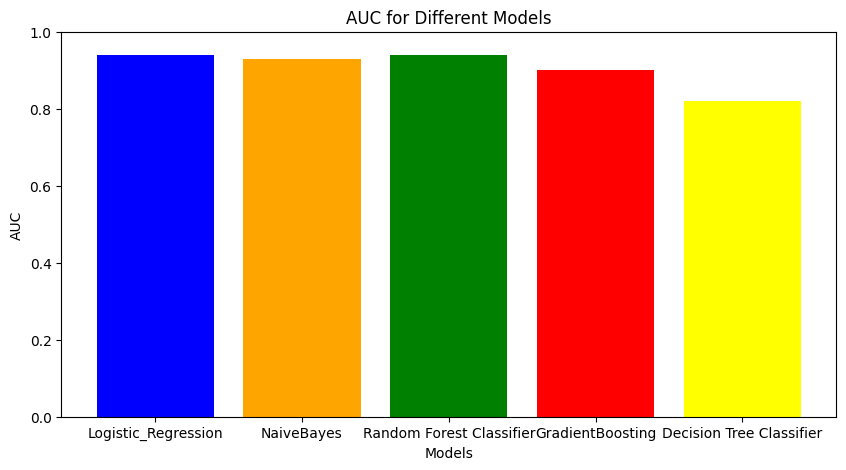

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 1000x600 with 0 Axes>

In [ ]:
# for TFIDF vectorizer

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Bar plot for AUC
plt.figure(figsize=(10, 5))
plt.bar(results_df1['modelname'], results_df1['auc_score'], color=['blue', 'orange', 'green','red','yellow'])
plt.title('AUC for Different Models')
plt.xlabel('Models')
plt.ylabel('AUC')
plt.ylim(0, 1)
plt.show()

# ROC Curve
plt.figure(figsize=(10, 6))

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
colors = cycle(['blue', 'orange', 'green'])
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], i))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Save SVM and Vectorizor

In [ ]:
import pickle

pickle.dump(model,open("model.pkl",'wb'))
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl','wb'))

# Load Model and Vectorizer

In [ ]:
model = pickle.load(open('model.pkl','rb'))
tfidf_vectorizer = pickle.load(open('tfidf_vectorizer.pkl','rb'))

# Detection System

In [ ]:
def detect(input_text):
    vectorized_text = tfidf_vectorizer.transform([input_text])
    result = model.predict(vectorized_text)
    return "Plagiarim Detected" if result[0] == 1 else "No Plagiarism"

In [ ]:
# example ( it is a plagarized text)
input_text = 'Researchers have discovered a new species of butterfly in the Amazon rainforest.'
detect(input_text)

'Plagiarim Detected'

In [ ]:
# example ( it has no plagiarism)
input_text = 'Playing musical instruments enhances creativity.'
detect(input_text)

ValueError: X has 1112 features, but DecisionTreeClassifier is expecting 944 features as input.

In [ ]:
# example ( it has no plagarism)
input_text = 'Practicing yoga enhances physical flexibility.'
detect(input_text)

'No Plagiarism'

In [ ]:
!pip install streamlit --quiet

In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
stop_words=nltk.corpus.stopwords.words('english')
import numpy as np
model=pickle.load(open('model.pkl','rb'))
tfidf_vectorizer = pickle.load(open('tfidf_vectorizer.pkl','rb'))
st.title("Plagiarism Detector")
ip=st.text_input("Enter message: ")
vectorized_text = tfidf_vectorizer.transform([ip])
result = model.predict(vectorized_text)
if st.button("Detect"):
    if result[0]==0:
        final='No Plagiarism Detected'
    else:
        final='Plagiarism Detected'
    st.subheader(str(final))

Overwriting app.py


In [35]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦⠧⠇
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.229.198.175:8501

⠏your url is: https://fuzzy-shirts-tell.loca.lt
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
  Stopping...
^C


In [33]:
data['plagiarized_text'].iloc[10]

'photosynthesis plants transforms sunlight usable energy'